In [1]:
!pip install tensorflow==2.9.0
!pip install ampligraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 30.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.12.23
    Uninstalling flatbuffers-24.12.23:
      Successfully uninstalled flatbuffers-24.12.23
  Attempting uninstall: tensorboard-data-se

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.0/567.0 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━

In [2]:
!pip install rdflib

In [2]:
import numpy as np
import pandas as pd
import ampligraph
import tensorflow as tf

In [3]:
from rdflib import Graph, URIRef

rdf_file = "dota2_ontology_v2.rdf"
g = Graph()
g.parse(rdf_file)

def get_label(entity, graph):
    for _, predicate, name in graph.triples((entity, None, None)):
        if str(predicate).endswith("name"):  # Проверяем, что это dataproperty для имени
            return str(name)
    return str(entity).split("#")[-1]  # Если имя не найдено, используем часть URI


def get_readable_predicate(predicate):
    local_name = str(predicate).split("#")[-1]
    return local_name

triplets = []
for subj, pred, obj in g:
    readable_subj = get_label(subj, g)
    readable_pred = get_readable_predicate(pred)
    readable_obj = get_label(obj, g)
    triplets.append((readable_subj, readable_pred, readable_obj))



In [4]:
from ampligraph.evaluation import train_test_split_no_unseen
import numpy as np

X_train, X_valid = train_test_split_no_unseen(np.array(triplets), test_size=300)

In [5]:
from ampligraph.latent_features import ScoringBasedEmbeddingModel
from ampligraph.latent_features.loss_functions import get as get_loss
from ampligraph.latent_features.regularizers import get as get_regularizer
import tensorflow as tf

model = ScoringBasedEmbeddingModel(k=100,
                                   eta=20,
                                   scoring_type='ComplEx',
                                   seed=0)

# Optimizer, loss and regularizer definition
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = get_loss('multiclass_nll')
regularizer = get_regularizer('LP', {'p': 3, 'lambda': 1e-5})

# Compilation of the model
model.compile(optimizer=optimizer, loss=loss, entity_relation_regularizer=regularizer)

In [6]:
model.fit(X_train,
          batch_size=50,
          epochs=300, # Number of training epochs
          verbose=True # Displays a progress bar.
          )

Epoch 1/300
49/49 [==============================] - 3s 52ms/step - loss: 151.4140
Epoch 2/300
49/49 [==============================] - 0s 5ms/step - loss: 151.3940
Epoch 3/300
49/49 [==============================] - 0s 7ms/step - loss: 151.3766
Epoch 4/300
49/49 [==============================] - 0s 7ms/step - loss: 151.3595
Epoch 5/300
49/49 [==============================] - 0s 7ms/step - loss: 151.3424
Epoch 6/300
49/49 [==============================] - 0s 7ms/step - loss: 151.3259
Epoch 7/300
49/49 [==============================] - 0s 5ms/step - loss: 151.3088
Epoch 8/300
49/49 [==============================] - 0s 5ms/step - loss: 151.2910
Epoch 9/300
49/49 [==============================] - 0s 5ms/step - loss: 151.2734
Epoch 10/300
49/49 [==============================] - 0s 5ms/step - loss: 151.2556
Epoch 11/300
49/49 [==============================] - 0s 5ms/step - loss: 151.2375
Epoch 12/300
49/49 [==============================] - 0s 5ms/step - loss: 151.2190
Epoch 13/300

In [7]:
ranks = model.evaluate(X_valid,
                      use_filter={'train': X_train,
                                  'test': X_valid},
                      corrupt_side='s,o',
                      verbose=True)

31/31 [==============================] - 6s 185ms/step


In [8]:
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score

mr = mr_score(ranks)
mrr = mrr_score(ranks)

print("MRR: %.2f" % (mrr))
print("MR: %.2f" % (mr))

hits_10 = hits_at_n_score(ranks, n=10)
print("Hits@10: %.2f" % (hits_10))
hits_3 = hits_at_n_score(ranks, n=3)
print("Hits@3: %.2f" % (hits_3))
hits_1 = hits_at_n_score(ranks, n=1)
print("Hits@1: %.2f" % (hits_1))

MRR: 0.28
MR: 34.26
Hits@10: 0.40
Hits@3: 0.30
Hits@1: 0.20


In [9]:
!git clone https://github.com/wyldebeast-wunderliebe/incf.countryutils.git
!cd incf.countryutils && pip install .

Cloning into 'incf.countryutils'...
remote: Enumerating objects: 132, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 132 (delta 20), reused 39 (delta 16), pack-reused 87 (from 1)
Receiving objects: 100% (132/132), 66.24 KiB | 5.52 MiB/s, done.
Resolving deltas: 100% (58/58), done.
Processing /content/incf.countryutils
  Preparing metadata (setup.py) ... done
  Created wheel for incf.countryutils: filename=incf.countryutils-1.2-py3-none-any.whl size=21366 sha256=38bcdc6c141e4c432d7d6274d38cba5aa5b173fb6b3e80a7231acda5f9bf336e
  Stored in directory: /tmp/pip-ephem-wheel-cache-050sovtj/wheels/c9/1a/60/d7400cda03816dbfc1647ccbb66be83b3e42077058131932d1
Successfully built incf.countryutils


In [10]:
!pip install adjustText

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from incf.countryutils import transformations
%matplotlib inline

In [23]:
import requests

heroes = requests.get("https://api.opendota.com/api/heroes").json()
heroes = [el["localized_name"].replace(" ", "-").replace("'", "") for el in heroes]

In [24]:
hero_embeddings = model.get_embeddings(heroes)

In [25]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in hero_embeddings]))

In [28]:
from ampligraph.discovery import find_clusters
from sklearn.cluster import KMeans

clustering_algorithm = KMeans(n_clusters=6, n_init=50, max_iter=500, random_state=0)
clusters = find_clusters(np.array(heroes), model, clustering_algorithm, mode='e')

In [29]:
plot_df = pd.DataFrame({"teams": heroes,
                        "embedding1": embeddings_2d[:, 0],
                        "embedding2": embeddings_2d[:, 1],
                        "cluster": "cluster" + pd.Series(clusters).astype(str)})

In [39]:
top_heroes = heroes[:60]

def plot_clusters():
    np.random.seed(0)
    plt.figure(figsize=(12, 12))
    plt.title("embeddings")
    ax = sns.scatterplot(data=plot_df, x="embedding1", y="embedding2")
    texts = []
    for i, point in plot_df.iterrows():
        if point["teams"] in top_heroes or np.random.random() < 0.1:
            texts.append(plt.text(point['embedding1']+0.02, point['embedding2']+0.01, str(point["teams"])))
    adjust_text(texts)

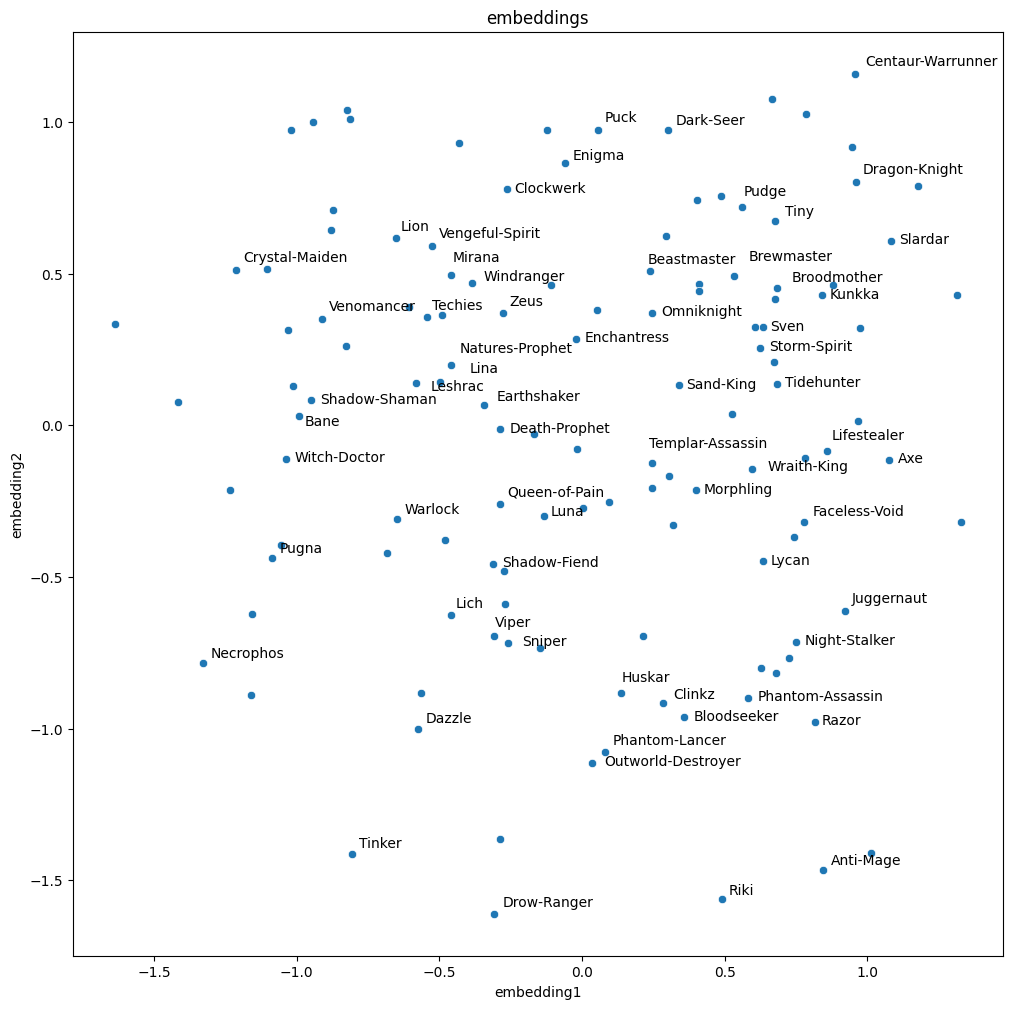

In [40]:
plot_clusters()

# Link prediction

In [44]:
X_train, X_valid = train_test_split_no_unseen(np.array(triplets), test_size=300)

In [46]:
df = pd.DataFrame(X_train,columns = ['subject','predicate','object'])
hero = "Pudge"
print(df[df.subject==hero])

     subject         predicate             object
165    Pudge        bestVersus             Oracle
321    Pudge  hero_attack_type              Melee
575    Pudge        bestVersus         Arc-Warden
666    Pudge         hero_name              Pudge
700    Pudge        bestVersus          Underlord
727    Pudge        bestVersus             Tinker
1181   Pudge        bestVersus            Spectre
1353   Pudge           hasRole              Nuker
1407   Pudge              type        strong_hero
1431   Pudge           hasRole           Disabler
1436   Pudge           hasRole          Initiator
1606   Pudge           hasRole            Durable
1746   Pudge        bestVersus              Marci
1859   Pudge          buysItem           ogre_axe
1890   Pudge          buysItem        aether_lens
2015   Pudge          buysItem  staff_of_wizardry
2253   Pudge        bestVersus         Ringmaster
2356   Pudge        bestVersus                Axe


In [49]:
dfFiltered = np.array(df[(df.subject!=hero) | ((df.subject==hero) & ~df.predicate.isin(["bestVersus"]))])

In [50]:
dfFiltered

array([['Shadow-Shaman', 'hasRole', 'Support'],
       ['Dazzle', 'bestVersus', 'Drow-Ranger'],
       ['Monkey-King', 'buysItem', 'maelstrom'],
       ...,
       ['Kunkka', 'bestVersus', 'Sand-King'],
       ['Kunkka', 'hasRole', 'Carry'],
       ['Slardar', 'buysItem', 'ogre_axe']], dtype=object)

In [51]:
model.fit(dfFiltered)

Epoch 1/100
4/4 [==============================] - 1s 146ms/step - loss: 90.3820
Epoch 2/100
4/4 [==============================] - 0s 111ms/step - loss: 90.5156
Epoch 3/100
4/4 [==============================] - 0s 120ms/step - loss: 90.6472
Epoch 4/100
4/4 [==============================] - 0s 106ms/step - loss: 90.7792
Epoch 5/100
4/4 [==============================] - 0s 72ms/step - loss: 90.9143
Epoch 6/100
4/4 [==============================] - 0s 68ms/step - loss: 91.0501
Epoch 7/100
4/4 [==============================] - 0s 67ms/step - loss: 91.1831
Epoch 8/100
4/4 [==============================] - 0s 62ms/step - loss: 91.3165
Epoch 9/100
4/4 [==============================] - 0s 71ms/step - loss: 91.4492
Epoch 10/100
4/4 [==============================] - 0s 100ms/step - loss: 91.5840
Epoch 11/100
4/4 [==============================] - 0s 113ms/step - loss: 91.7159
Epoch 12/100
4/4 [==============================] - 0s 101ms/step - loss: 91.8485
Epoch 13/100
4/4 [============

In [78]:
statements = np.array([
    [f"{hero}", "bestVersus", "Axe"],
    [f"{hero}", "bestVersus", "Tinker"],
    [f"{hero}", "bestVersus", "Night-Stalker"],
    [f"{hero}", "bestVersus", "Oracle"],
])

In [79]:
statements_filter = np.array(list({tuple(i) for i in np.vstack((dfFiltered, statements))}))
statements_filter

array([['Io', 'buysItem', 'mekansm'],
       ['Legion-Commander', 'hasRole', 'Nuker'],
       ['Warlock', 'bestVersus', 'Axe'],
       ...,
       ['Leshrac', 'hasRole', 'Nuker'],
       ['Magnus', 'hero_attack_type', 'Melee'],
       ['Windranger', 'buysItem', 'staff_of_wizardry']], dtype='<U55')

In [80]:
ranks = model.evaluate(statements,
                      use_filter={'train': dfFiltered,
                                  'test': statements},
                      corrupt_side='s,o',
                      verbose=True)

2/2 [==============================] - 1s 668ms/step


In [81]:
scores = model.predict(statements)
scores

array([5.062058  , 5.59804   , 0.98821723, 4.9503045 ], dtype=float32)

In [82]:
from scipy.special import expit
probs = expit(scores)

pd.DataFrame(list(zip([' '.join(x) for x in statements],
                      ranks,
                      np.squeeze(scores),
                      np.squeeze(probs))),
             columns=['statement', 'rank', 'score', 'prob']).sort_values("prob")

,statement,rank,score,prob
2,Pudge bestVersus Night-Stalker,"[89, 84]",0.988217,0.728736
3,Pudge bestVersus Oracle,"[1, 6]",4.950305,0.992968
0,Pudge bestVersus Axe,"[1, 6]",5.062058,0.993707
1,Pudge bestVersus Tinker,"[1, 2]",5.598040,0.996309
